## Prac1. Autoencoder

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed(777)

cpu


In [3]:
fashion_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
fashion_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

fashion_train.data = fashion_train.data / 255.0
fashion_train.targets = fashion_train.targets
fashion_test.data = fashion_test.data / 255.0
fashion_test.targets = fashion_test.targets

tensor(0)


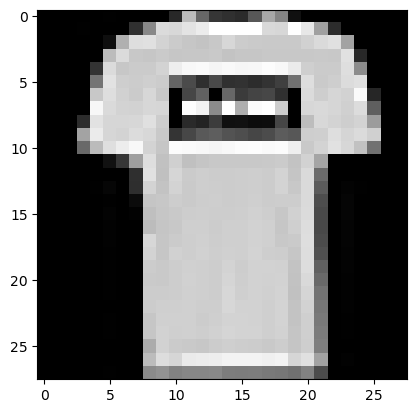

In [4]:
plt.imshow(fashion_train.data[1], cmap="gray")
print(fashion_train.targets[1])

In [5]:
batch_size = 256

train_loader = DataLoader(dataset=fashion_train.data, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=fashion_test.data, batch_size=len(fashion_test.data), shuffle=False, drop_last=False)

In [6]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(784, 16)
    self.decoder = nn.Linear(16, 784)

  def forward(self, x):
    z_vector = self.encoder(x)
    output = self.decoder(z_vector)

    return torch.sigmoid(output)

In [7]:
model = Autoencoder().to(device)
model

Autoencoder(
  (encoder): Linear(in_features=784, out_features=16, bias=True)
  (decoder): Linear(in_features=16, out_features=784, bias=True)
)

In [8]:
num_epochs = 10
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, images in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    print(images.shape)
    input_image = images.reshape(-1, 28 * 28)
    optimizer.zero_grad()
    y_predict = model(input_image)
    print(input_image.dtype)
    loss = criterion(y_predict, input_image)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item() / num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num + 1), average_cost))

torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32


torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])


torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])


torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([96, 28, 28])
torch.float32
Epoch 3 Loss 0.03195
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28,

torch.Size([256, 28, 28])
torch.float32
torch.Size([96, 28, 28])
torch.float32
Epoch 4 Loss 0.02705
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28,

torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32


torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])


torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32


torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])


torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])
torch.float32
torch.Size([256, 28, 28])


In [10]:
for batch_idx, image in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.reshape(-1, 784).to(device)
    test_recon_x = model(test_img)

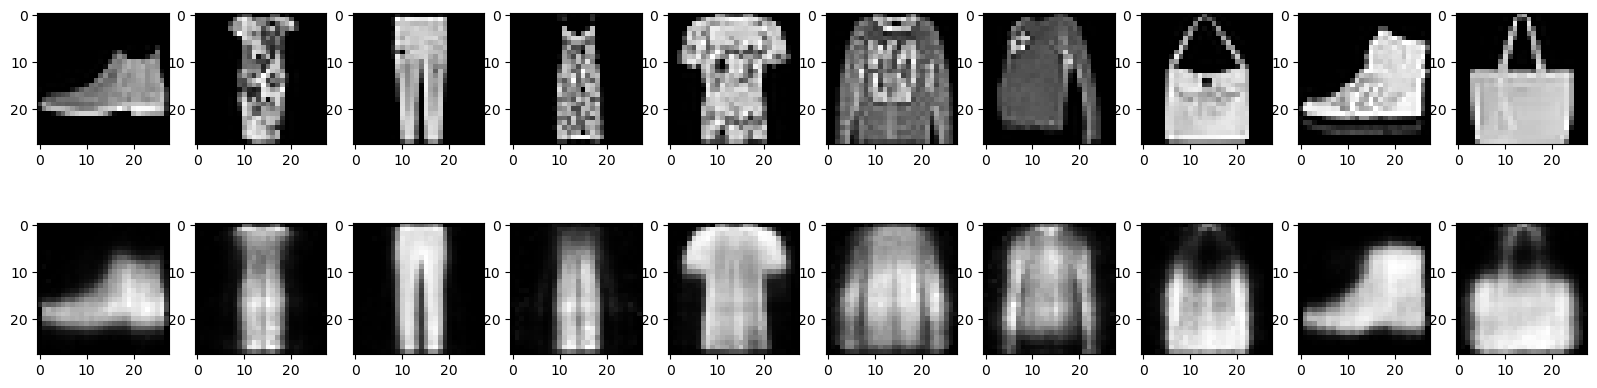

In [11]:
n = 10
plt.figure(figsize=(20, 5))

for i in range(n):
    ax = plt.subplot(2, 10, i + 1)
    test_img = image[i * 100].to(device)
    plt.imshow(test_img.cpu(), cmap='gray') # original image

    ax = plt.subplot(2, 10, i + 1 + n)
    recon_image = test_recon_x.data[i * 100].reshape(28, 28)
    plt.imshow(recon_image.cpu(), cmap='gray') # reconstruct image

## Prac2. Variational Autoencoder (VAE)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed(777)

cpu


In [14]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [15]:
batch_size = 256

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

In [16]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.mu = nn.Linear(400, 20)
        self.logvar = nn.Linear(400, 20)
        self.fc2 = nn.Linear(20, 400)
        self.fc3 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.mu(h1)
        logvar = self.logvar(h1)

        return mu, logvar

    def reparameterize(self, mu_vector, logvar_vector):
        var_vector = torch.exp(logvar_vector)
        std = torch.sqrt(var_vector)
        eps = torch.randn_like(std)
        z_vector = mu_vector + eps.mul(std)

        return z_vector

    def decode(self, z):
        h2 = F.relu(self.fc2(z))
        Bernouhlli_p = torch.sigmoid(self.fc3(h2))

        return Bernouhlli_p

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        Bernouhlli_p = self.decode(z)

        return Bernouhlli_p, mu, logvar

In [17]:
model = VAE().to(device)
model

VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (mu): Linear(in_features=400, out_features=20, bias=True)
  (logvar): Linear(in_features=400, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=784, bias=True)
)

In [18]:
def loss_function(recon_x, x, mu, logvar):
    Bernouhlli_loss = F.binary_cross_entropy(recon_x, x.reshape(-1, 784), reduction='sum')
    KL_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return Bernouhlli_loss + KL_divergence

In [19]:
num_epochs = 10
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (images, label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    input_image = images.reshape(-1, 28 * 28)
    optimizer.zero_grad()
    recon_x, mu, logvar = model(input_image)
    loss = loss_function(recon_x, input_image, mu, logvar)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item() / num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num + 1), average_cost))

Epoch 1 Loss 48076.35132
Epoch 2 Loss 33739.56884
Epoch 3 Loss 30886.42128
Epoch 4 Loss 29613.60273
Epoch 5 Loss 28941.46652
Epoch 6 Loss 28500.46248
Epoch 7 Loss 28189.57734
Epoch 8 Loss 27946.27648
Epoch 9 Loss 27733.59229
Epoch 10 Loss 27579.65581


In [21]:
for batch_idx, (image, label) in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.reshape(-1, 784).to(device)
    test_recon_x, _, _ = model(test_img)

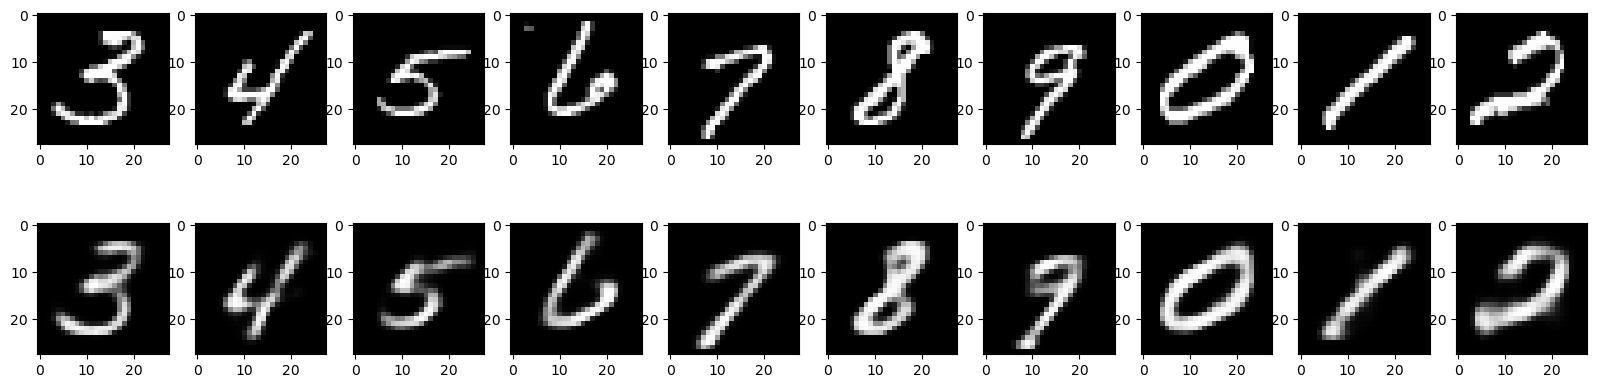

In [22]:
n = 10
plt.figure(figsize=(20, 5))

for i in range(n):
    ax = plt.subplot(2, 10, i + 1)
    image = test_img[i].reshape(28, 28)
    plt.imshow(image.cpu(), cmap='gray')

    ax = plt.subplot(2, 10, i + 1 + n)
    recon_image = test_recon_x.data[i].reshape(28, 28)
    plt.imshow(recon_image.cpu(), cmap='gray')

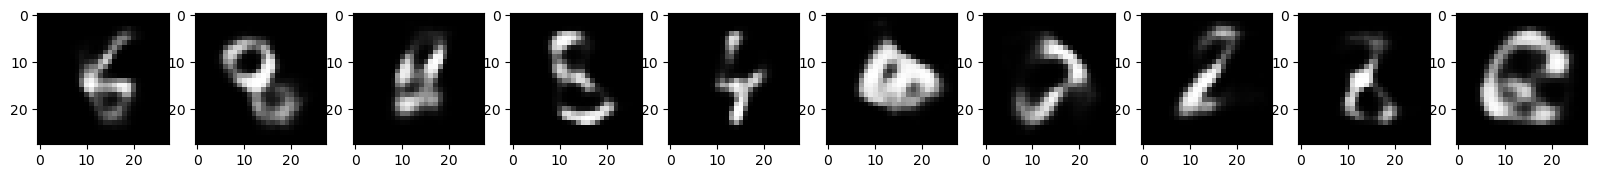

In [23]:
plt.figure(figsize=(20, 4))

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    with torch.no_grad():
        sample_z = torch.randn(20).to(device)
        input_z = sample_z
        sample = model.decode(input_z).cpu()
        plt.imshow(sample.reshape(28, 28), cmap='gray')